In [2]:
import numpy as np
import matplotlib.pyplot as plt

from smogoutils import get_all_data_adj, compute_spiking_node_representation as csnr

In [3]:
data_folder = "BRCA"
view_list = [1, 2, 3]
num_view=3
num_class = 5

(
    data_tr_list,
    data_trte_list,
    trte_idx,
    labels_trte,
    labels_tr_tensor,
    onehot_labels_tr_tensor,
    adj_tr_list,
    adj_te_list,
    dim_list,
) = get_all_data_adj(
    data_folder,
    view_list,
    num_class,
)

/Users/gabriquaranta/repos/mla-prj-24-mla24-prj19-gu1/SMOGONET/smogoutils.py:120: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:623.)
  return sparse_tensortype(indices, values, x.size())


# BASIC STATS

Breast invasive carcinoma PAM50 subtype classification    
0: Normal-like    
1: Basal-like    
2: HER2-enriched    
3: Luminal A    
4: Luminal B    


Class distribution:
  Class 0: 80 -> 13.07%
  Class 1: 92 -> 15.03%
  Class 2: 32 -> 5.23%
  Class 3: 305 -> 49.84%
  Class 4: 103 -> 16.83%

Training set sample size: 612

View 0
 Num features: 1000
 Count of zero elements: 21915

View 1
 Num features: 1000
 Count of zero elements: 10

View 2
 Num features: 503
 Count of zero elements: 48570


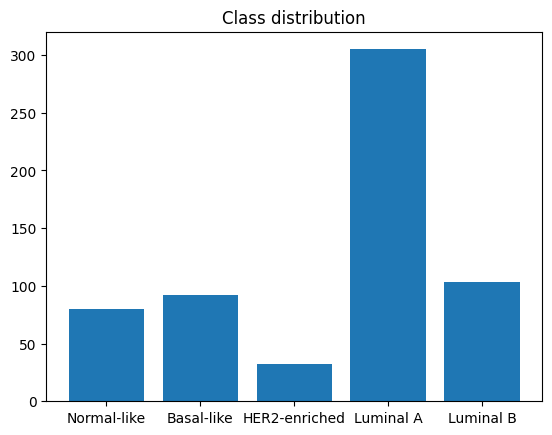

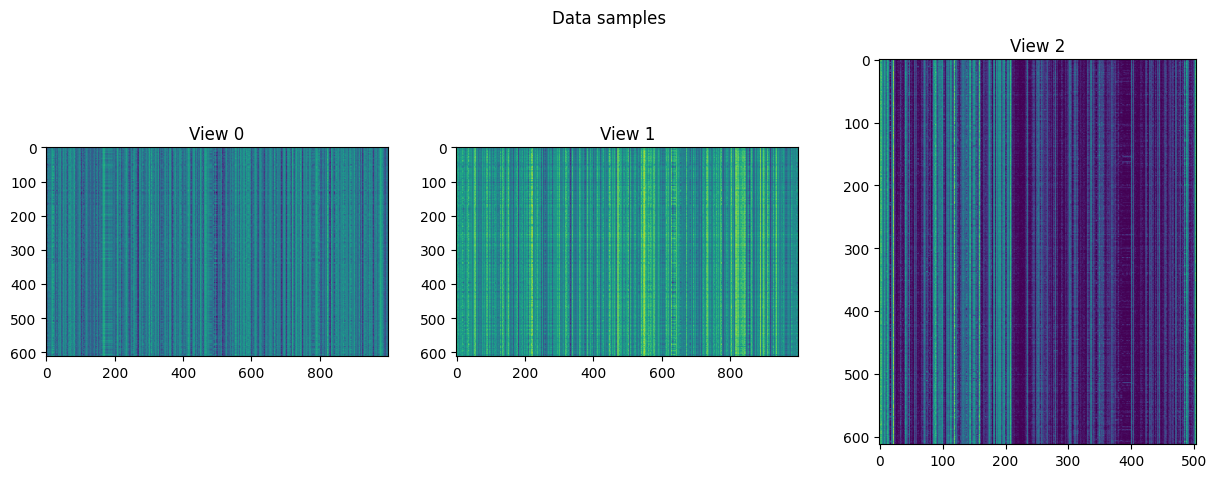

In [5]:
print(f"Class distribution:")
cc= [np.count_nonzero(labels_tr_tensor.detach() == i) for i in range(5)]
for i in range(5):
    print(f"  Class {i}: {cc[i]} -> {100.0*cc[i]/len(labels_tr_tensor):.2f}%")

print(f"\nTraining set sample size: {len(labels_tr_tensor)}")

for i in range(num_view):
    print(f"\nView {i}")
    print(f" Num features: {data_tr_list[i].shape[1]}")
    print(f" Count of zero elements: {data_tr_list[i].shape[0]*data_tr_list[i].shape[1] - np.count_nonzero(data_tr_list[i])}")


plt.title("Class distribution")
plt.bar(["Normal-like","Basal-like","HER2-enriched","Luminal A","Luminal B"], cc)    

# looks cool but seems useless
fig, axs = plt.subplots(1, num_view, figsize=(15, 5))
plt.suptitle("Data samples")
for i in range(num_view):
    axs[i].imshow(data_tr_list[i])
    axs[i].set_title(f"View {i}")


# CORR MATRICES

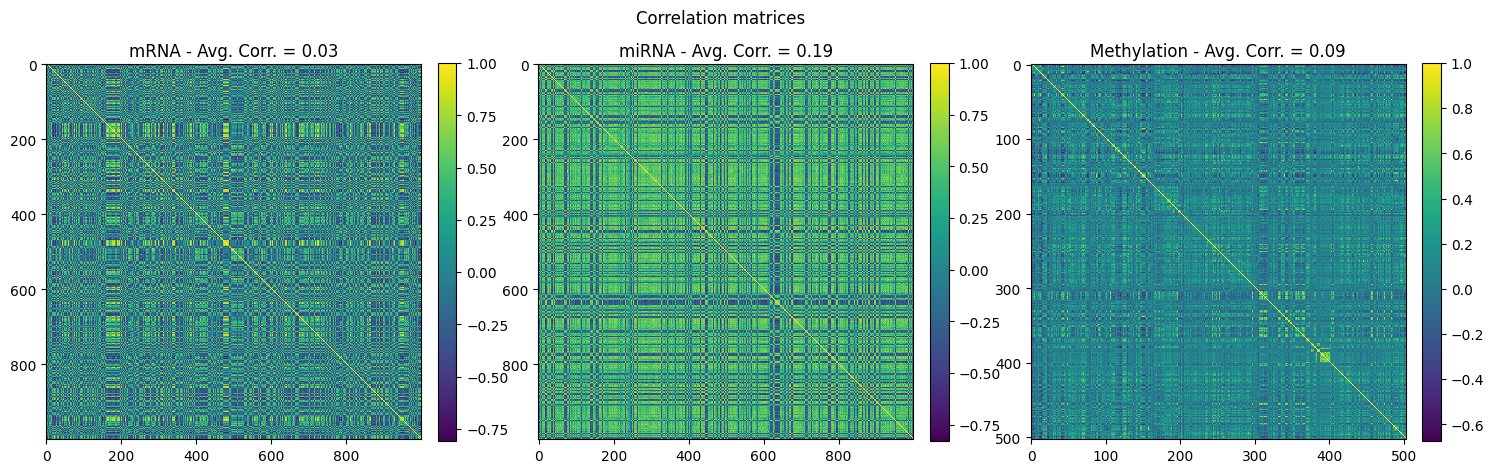

In [122]:
# corr matrices
plt.figure(figsize=(18, 5))
plt.suptitle("Correlation matrices")

plt.subplot(1, 3, 1)
corr1 = np.corrcoef(data_tr_list[0].T)
plt.imshow(corr1, interpolation="nearest")
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("mRNA - Avg. Corr. = {:.2f}".format(np.mean(corr1)))

plt.subplot(1, 3, 2)
corr2 = np.corrcoef(data_tr_list[1].T)
plt.imshow(corr2,  interpolation="nearest")
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("miRNA - Avg. Corr. = {:.2f}".format(np.mean(corr2)))

plt.subplot(1, 3, 3)
corr3 = np.corrcoef(data_tr_list[2].T)
plt.imshow(corr3, interpolation="nearest")
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Methylation - Avg. Corr. = {:.2f}".format(np.mean(corr3)))

plt.show()

In [135]:
# mRNA
corr1 = np.corrcoef(data_tr_list[0].T)
corr1 = np.abs(corr1)
np.fill_diagonal(corr1, 0)
corr1 = np.where(corr1 > 0.9)
corr1 = np.unique(corr1[0])
print(f"mRNA: {len(corr1)} features with corr > 0.9")

# miRNA
corr2 = np.corrcoef(data_tr_list[1].T)
corr2 = np.abs(corr2)
np.fill_diagonal(corr2, 0)
corr2 = np.where(corr2 > 0.9)
corr2 = np.unique(corr2[0])
print(f"miRNA: {len(corr2)} features with corr > 0.9")

# methylation
corr3 = np.corrcoef(data_tr_list[2].T)
corr3 = np.abs(corr3)
np.fill_diagonal(corr3, 0)
corr3 = np.where(corr3 > 0.9)
corr3 = np.unique(corr3[0])
print(f"Methylation: {len(corr3)} features with corr > 0.9")



mRNA: 87 features with corr > 0.9
miRNA: 78 features with corr > 0.9
Methylation: 46 features with corr > 0.9
